<a href="https://colab.research.google.com/github/alexyev/Grover-s_Algorithm/blob/main/Grover's_Algorithm_3qbit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
!pip install qiskit
from qiskit import IBMQ, Aer, assemble, transpile, execute
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy
!pip install qiskit.visualization
from qiskit.visualization import *
from qiskit.tools.jupyter import *
!pip install ibm_quantum_widgets
from ibm_quantum_widgets import *
from qiskit.tools.monitor import job_monitor

ERROR: Could not find a version that satisfies the requirement qiskit.visualization
ERROR: No matching distribution found for qiskit.visualization


Let's solve Grover's Algorithm on 3 qubits with 2 possible solutions.

In [2]:
def initialize_circuit(qc, qubits):
  for q in qubits:
    qc.h(q)
  return qc

In [72]:
qc = QuantumCircuit(3)
qc.s(0)
qc.s(1)
qc.s(2)
qc.h(2)
qc.mct([0, 1], 2)
qc.h(2)
qc.s(0)
qc.s(1)
qc.s(2)
oracle_3 = qc.to_gate()
oracle_3.name = "Uω"

Here, we create an oracle function that will look for 2 specific states: |101〉 and |110〉.

In [4]:
def diffuser(qubits):
  qc = QuantumCircuit(qubits)
  for qubit in range(qubits):
    qc.h(qubit) 
  for qubit in range(qubits):
    qc.x(qubit)
  qc.h(qubits-1)
  qc.mct(list(range(qubits-1)), qubits -1)
  qc.h(qubits-1)
  for qubit in range(qubits):
    qc.x(qubit)
  for qubit in range(qubits):
    qc.h(qubit)
  U_s = qc.to_gate()
  U_s.name = "Us"
  return U_s


Here, we define a general diffuser function that will work on any number of qubits passed in.

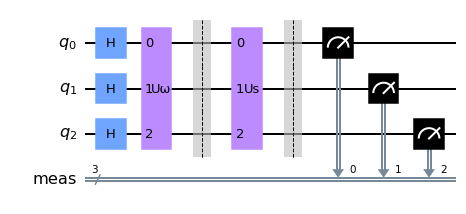

In [73]:
n_qubits = 3
grover_circuit = QuantumCircuit(n_qubits)
grover_circuit = initialize_circuit(grover_circuit, [0, 1, 2])
grover_circuit.append(oracle_3, [0, 1, 2])
grover_circuit.barrier([0, 1, 2])
grover_circuit.append(diffuser(n_qubits), [0, 1, 2])
grover_circuit.measure_all()
grover_circuit.draw()

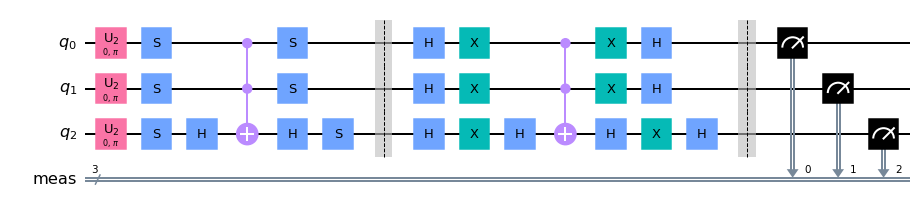

In [74]:
decomposed_circ = grover_circuit.decompose()
decomposed_circ.draw('mpl')

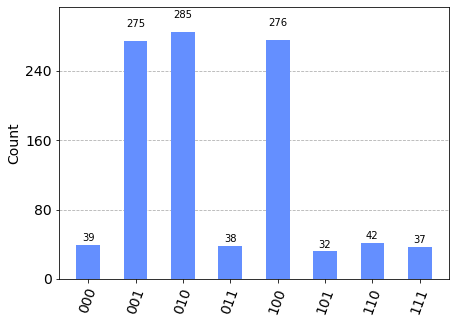

In [75]:
backend = Aer.get_backend('qasm_simulator')
transpiled_grover_circuit = transpile(grover_circuit, backend)
job = execute(transpiled_grover_circuit, backend)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

In [7]:
provider = IBMQ.load_account()
device_2 = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 3 and 
                                   not x.configuration().simulator and x.status().operational==True))
print(device_2)

ibmq_quito


In [ ]:
transpiled_grover_circuit_2 = transpile(grover_circuit, device_2, optimization_level=3)
job = device_2.run(transpiled_grover_circuit_2)
job_monitor(job, interval=2)

Job Status: job is queued (10)    

In [ ]:
results_2 = job.result()
answer_2 = results_2.get_counts()
plot_histogram(answer_2)